# Problem 2 - Logistic Regression + LDA

## Problem statement: 
You are hired by a sports analysis agency to understand the selection process of high school football players into college with a full or partial scholarship. You are provided details of 6215 high school graduates who have been inducted into 4-year degree colleges with either full or partial scholarships. 

## Objective:
 Objective is to help the agency in predicting whether a high school graduate will win a full scholarship on the basis of the information given in the data set. Also, find out the important factors which are instrumental in winning a full scholarship in colleges.

## The data dictionary is given below. 


## Data Dictionary


Scholarship -             Won a college scholarship: Full / Partial

Academic Score -          High school academic performance of a candidate

Score on Plays Made -     A composite score based on the achievements on the field

Missed Play Score -       A composite score based on the failures on the field

Injury Propensity -       This has 3 ordinal levels: High, Moderate, Normal and Low. It has been calculated based on what                                 proportion of time a candidate had an injury problem

School Type -             3 types of schools based on their location

School Score -            A composite score based on the overall achievement of the candidates’ school, based on the schools                             academic, sports and community service performance

Overall Score -           A composite score based on a candidate’s family financial state, school performance, psychosocial                               attitude etc

Region -                  Region of the country where the school is located

# Import the necessary libraries and load the dataset.

In [165]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")
pd.pandas.set_option('display.max_columns',None)
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [166]:
plt.rcParams['font.size']=16
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 100)

In [167]:
import os

In [168]:
print(os.__file__)

C:\Users\niranja.dhavan\Anaconda3\lib\os.py


In [169]:
pwd

'C:\\Users\\niranja.dhavan\\Desktop\\Predictive Modelling\\Group Assignment\\Logistic regression & LDA'

# Loading the data

In [170]:
df = pd.read_csv('Football+Scholarship.csv')
df.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial


In [171]:
df.tail()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
6210,6.8,0.620,0.08,Low,C,0.82,9.5,Eastern,Full
6211,6.2,0.600,0.08,Low,C,0.58,10.5,Western,Full
6212,5.9,0.550,0.10,Low,C,0.76,11.2,Eastern,Full
6213,6.3,0.510,0.13,Low,C,0.75,11.0,Eastern,Full
6214,5.9,0.645,0.12,Low,C,0.71,10.2,Western,Full


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       6215 non-null   float64
 1   Score_on_Plays_Made  6215 non-null   float64
 2   Missed_Play_Score    6215 non-null   float64
 3   Injury_Propensity    6215 non-null   object 
 4   School_Type          6215 non-null   object 
 5   School_Score         6215 non-null   float64
 6   Overall_Score        6215 non-null   float64
 7   Region               6215 non-null   object 
 8   Scholarship          6215 non-null   object 
dtypes: float64(5), object(4)
memory usage: 437.1+ KB


# Basic Exploratory Data Analysis

In [173]:
# print the number of records and features/aspects we have in the provided file
df.shape

(6215, 9)

We have more than 6215 records having 9 features

In [174]:
# let's check out the columns/features we have in the dataset
df.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Type', 'School_Score', 'Overall_Score',
       'Region', 'Scholarship'],
      dtype='object')

### Check the data types of all the variables and get the unique counts of all the 'Object' type variables.

####  lets check unique values in Below variables..


* <font color = 'blue'>__Injury_Propensity__</font>
* <font color = 'blue'>__School_Type__</font>
* <font color = 'blue'>__Region__</font>
* <font color = 'blue'>__Scholarship__</font>


In [175]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Injury_Propensity
Low         2650
Normal      1319
High        1181
Moderate    1065
Name: Injury_Propensity, dtype: int64


School_Type
C    3384
B    1620
D    1211
Name: School_Type, dtype: int64


Region
Eastern     2835
Western     1724
Southern    1656
Name: Region, dtype: int64


Scholarship
Partial    4028
Full       2187
Name: Scholarship, dtype: int64




### Check for missing values and impute the missing values, if any is present.

In [176]:
df.isnull().sum().sort_values(ascending = False)

Scholarship            0
Region                 0
Overall_Score          0
School_Score           0
School_Type            0
Injury_Propensity      0
Missed_Play_Score      0
Score_on_Plays_Made    0
Academic_Score         0
dtype: int64

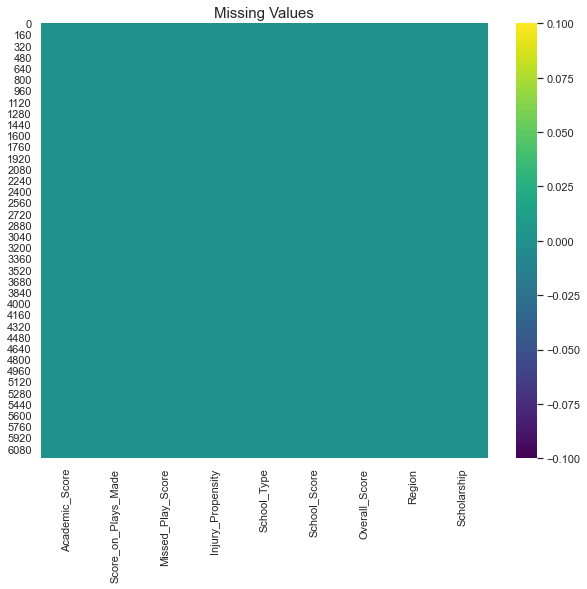

In [177]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values', fontsize=15)
plt.show()

As we can see there are no null values. 

##### Data Seems to be clean


### Let us check for duplicate values in the dataset.

In [178]:
duplicate = df[df.duplicated()] 
duplicate

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
4,7.2,0.230,0.32,Moderate,C,0.40,9.9,Eastern,Partial
5,8.1,0.280,0.40,Moderate,C,0.44,10.1,Eastern,Partial
7,7.0,0.270,0.36,High,D,0.45,8.8,Eastern,Partial
8,6.3,0.300,0.34,Low,C,0.49,9.5,Eastern,Partial
36,7.3,0.240,0.39,High,D,0.36,8.6,Southern,Partial
...,...,...,...,...,...,...,...,...,...
6180,7.2,0.695,0.13,Low,C,0.54,10.1,Western,Full
6181,7.2,0.695,0.13,Low,C,0.54,10.1,Western,Full
6184,7.2,0.695,0.13,Low,C,0.54,10.1,Western,Full
6198,6.2,0.560,0.09,Low,C,0.60,11.3,Western,Full


We can see that there are dulpicated values in the dataset

In [179]:
duplicate.shape

(947, 9)

#### Let us now drop duplicate values from the dataset

In [180]:
df.drop_duplicates(inplace=True)

In [181]:
df.shape

(5268, 9)

In [182]:
print('Percentage of rows dropped from orignal datset: {:.2f}%'.format((6215 - 5268 )*100/6215))

Percentage of rows dropped from orignal datset: 15.24%


Post cleaning the data set we have lost 15.24% of data from orignal data set.

### Data Pre Processing 

Treat the object variables appropriately by either creating dummy variables (One-Hot Encoding) or coding it up in an ordinal manner.

Further one hot encoding is done at the time of Running logistic regression model.

In [183]:
#Replace the categorical variables with the numbers as its a ordinal range.
df['Scholarship'] = df['Scholarship'].map({'Partial': 0, 'Full': 1})


In [184]:
#Replace the categorical variables with the numbers as its a ordinal range.
df['Injury_Propensity'] = df['Injury_Propensity'].map({'Low': 0, 'Normal': 1, 'Moderate': 2, 'High': 3})


In [185]:
df.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,3,D,0.45,8.8,Eastern,0
1,6.3,0.30,0.34,0,C,0.49,9.5,Eastern,0
2,8.1,0.28,0.40,2,C,0.44,10.1,Eastern,0
3,7.2,0.23,0.32,2,C,0.40,9.9,Eastern,0
6,6.2,0.32,0.16,2,C,0.47,9.6,Eastern,1


In [186]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Academic_Score,5268.0,7.205363,1.299212,3.80,6.40,6.90,7.7,15.90
Score_on_Plays_Made,5268.0,0.337905,0.161308,0.08,0.23,0.29,0.4,1.33
Missed_Play_Score,5268.0,0.320306,0.146286,0.00,0.25,0.31,0.4,1.66
Injury_Propensity,5268.0,1.066439,1.132292,0.00,0.00,1.00,2.0,3.00
School_Score,5268.0,0.531380,0.146938,0.22,0.43,0.51,0.6,1.98
Overall_Score,5268.0,10.502904,1.169325,8.00,9.50,10.30,11.3,14.90
Scholarship,5268.0,0.366553,0.481909,0.00,0.00,0.00,1.0,1.00


## Exploratory Data Analysis

In this section, we will explore the data using visualizations. This will allow us to understand the data and the relationships between variables better, which will help us build a better model.

Target Variable Distribution Our dataset contains a lot of variables, but the most important one for us to explore is the target variable. We need to understand its distribution.

### Target Variable Distribution

In [187]:
df['Scholarship'].value_counts()

0    3337
1    1931
Name: Scholarship, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

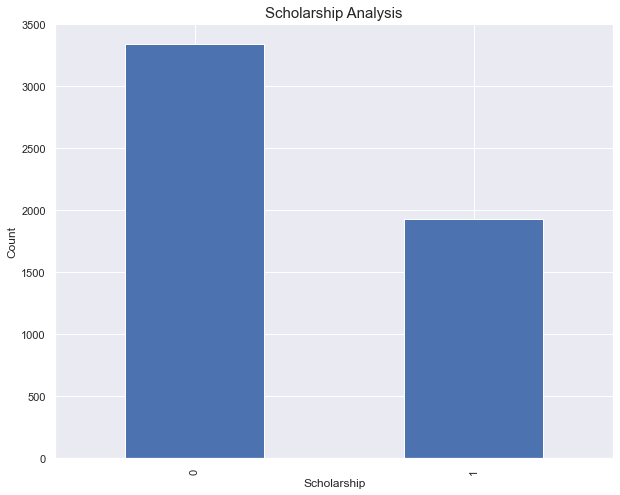

In [188]:
plt.figure(figsize=(10,8))
df['Scholarship'].value_counts().plot(kind='bar')
plt.title('Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Count')
plt.title("Scholarship Analysis", size=15)
sns.despine

### Skewness - 

* If skewness is less than -1 or greater than 1, the distribution is highly skewed.


* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.


* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

## Let's do some visual data analysis of the Dependent features



#### Analyzing Feature: Academic_Score¶

Skewness is : 1.692631887242448


Text(0.5, 0.98, 'Academic_Score Variable Anaylsis')

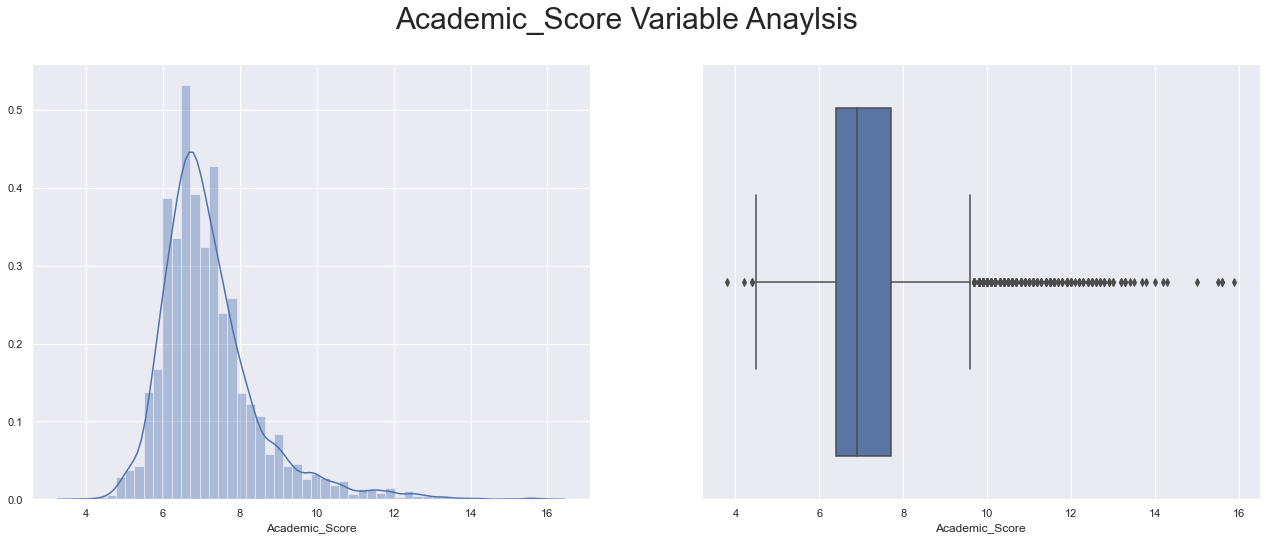

In [189]:
print("Skewness is :",df.Academic_Score.skew())
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['Academic_Score'], ax=ax[0])
sns.boxplot(df['Academic_Score'],  orient='h', ax=ax[1])
fig.suptitle("Academic_Score Variable Anaylsis", size=30)

* The Academic_Score Variable distribution seems to be Right skewed. 


* Basis skewness value we can see that distribution is highly skewed


* Basis box plot we can see that there are outliers in the varaible. Lets treat the outliers in the further process.

#### Analyzing Feature: Score_on_Plays_Made

Skewness is : 1.442254718492108


Text(0.5, 0.98, 'Score_on_Plays_Made Variable Anaylsis')

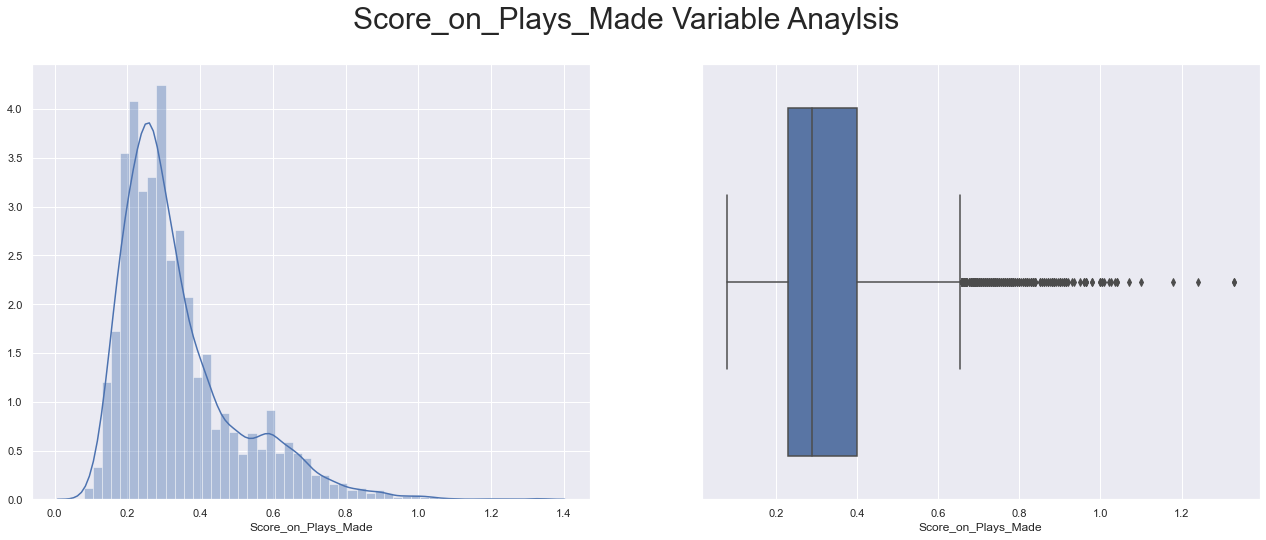

In [190]:
print("Skewness is :",df.Score_on_Plays_Made.skew())
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['Score_on_Plays_Made'], ax=ax[0])
sns.boxplot(df['Score_on_Plays_Made'],  orient='h', ax=ax[1])
fig.suptitle("Score_on_Plays_Made Variable Anaylsis", size=30)


* The Score_on_Plays_Made Variable distribution seems to be Right skewed. 


* Basis skewness value we can see that distribution is highly skewed


* Basis box plot we can see that there are outliers in the varaible. Lets treat the outliers in the further process.

#### Analyzing Feature: Missed_Play_Score

Skewness is : 0.5334340239786227


Text(0.5, 0.98, 'Missed_Play_Score Variable Anaylsis')

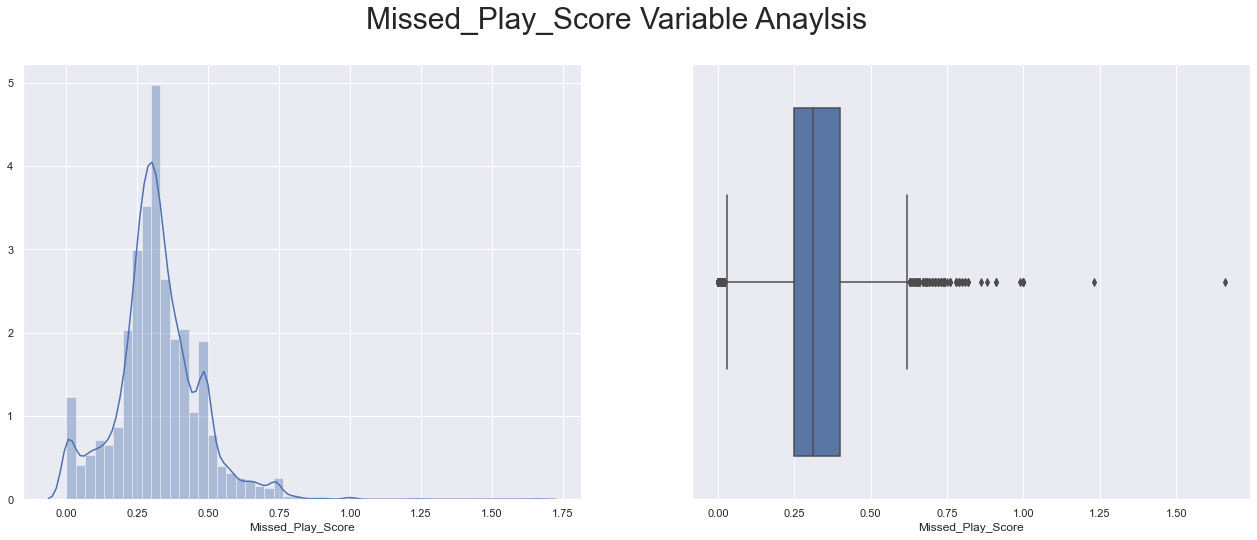

In [191]:
print("Skewness is :",df.Missed_Play_Score.skew())
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['Missed_Play_Score'], ax=ax[0])
sns.boxplot(df['Missed_Play_Score'],  orient='h', ax=ax[1])
fig.suptitle("Missed_Play_Score Variable Anaylsis", size=30)

* The Missed_Play_Score Variable distribution seems to be Normally skewed. 


* Basis skewness value we can see that distribution seems to be approximately symmetric


* Basis box plot we can see that there are outliers in the varaible. Lets treat the outliers in the further process.

#### Analyzing Feature: Injury_Propensity

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

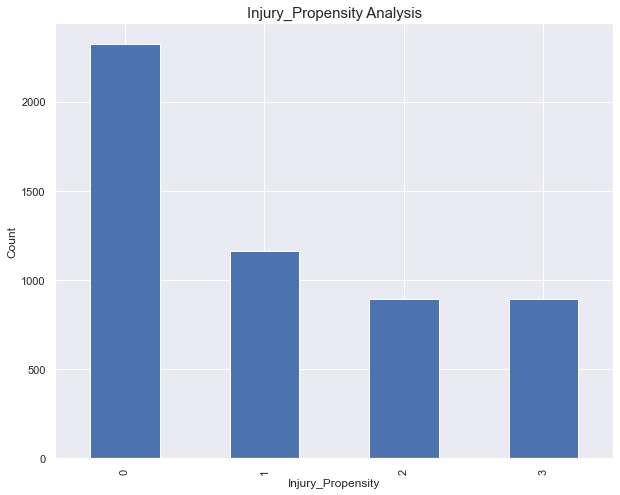

In [192]:
plt.figure(figsize=(10,8))
df['Injury_Propensity'].value_counts().plot(kind='bar')
plt.title('Injury_Propensity')
plt.xlabel('Injury_Propensity')
plt.ylabel('Count')
plt.title("Injury_Propensity Analysis", size=15)
sns.despine

* Basis above figure we can see that there are many students with low (0) Injury_Propensity.


* Basis above figure we can see that there are low students with High (3) Injury_Propensity.

#### Analyzing Feature: School_Type

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

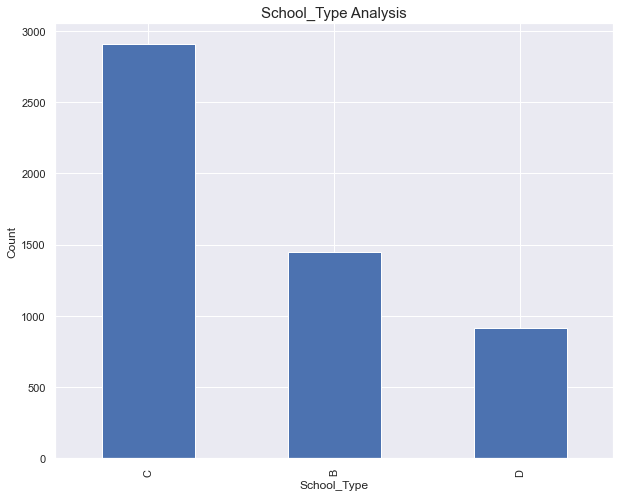

In [193]:
plt.figure(figsize=(10,8))
df['School_Type'].value_counts().plot(kind='bar')
plt.title('School_Type')
plt.xlabel('School_Type')
plt.ylabel('Count')
plt.title("School_Type Analysis", size=15)
sns.despine

* Basis above figure we can see that 'C' Type school are more in number Followed by School Type 'B'.


* Basis above figure we can see that D' Type school are Low in number.

#### Analyzing Feature: School_Score

Skewness is : 1.7302026111456426


Text(0.5, 0.98, 'School_Score Variable Anaylsis')

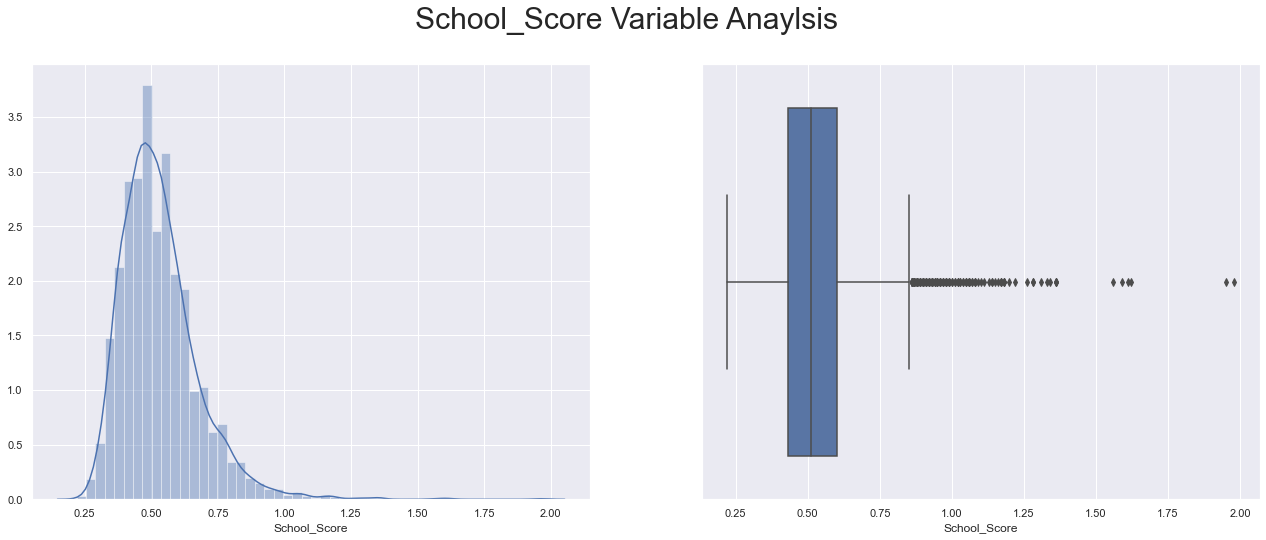

In [194]:
print("Skewness is :",df.School_Score.skew())
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['School_Score'], ax=ax[0])
sns.boxplot(df['School_Score'],  orient='h', ax=ax[1])
fig.suptitle("School_Score Variable Anaylsis", size=30)


* The School_Score Variable distribution seems to be slightly right skewed. 


* Basis skewness value we can see that distribution seems to be approximately symmetric


* Basis box plot we can see that there are outliers in the varaible. Lets treat the outliers in the further process.

#### Analyzing Feature: Overall_Score

Skewness is : 0.5814151079101907


Text(0.5, 0.98, 'Overall_Score Variable Anaylsis')

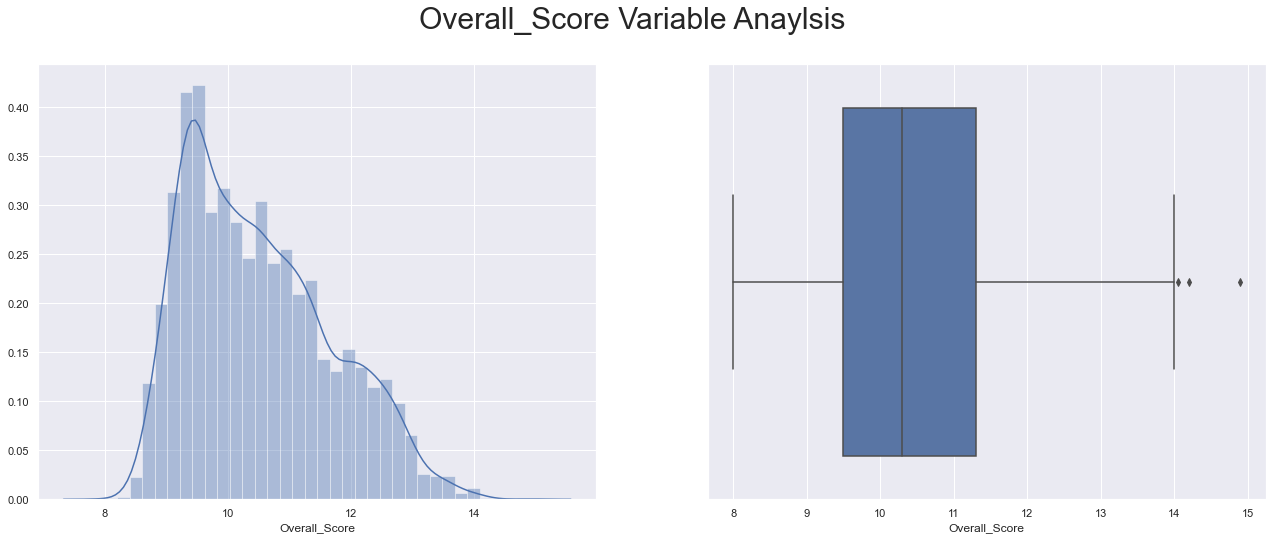

In [195]:
print("Skewness is :",df.Overall_Score.skew())
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['Overall_Score'], ax=ax[0])
sns.boxplot(df['Overall_Score'],  orient='h', ax=ax[1])
fig.suptitle("Overall_Score Variable Anaylsis", size=30)


* The Overall_Score Variable distribution seems to be right skewed. 


* Basis skewness value we can see that distribution seems to be approximately symmetric


* Basis box plot we can see that there are couple of outliers in the varaible. Lets treat the outliers in the further process.

#### Analyzing Feature: Region

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

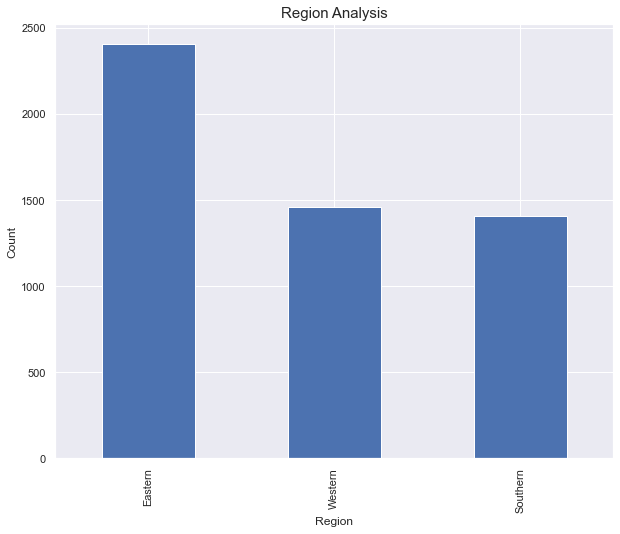

In [196]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot(kind='bar')
plt.title('Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title("Region Analysis", size=15)
sns.despine

### Bi-Variate Analysis on Price Variable

#### PairPlot

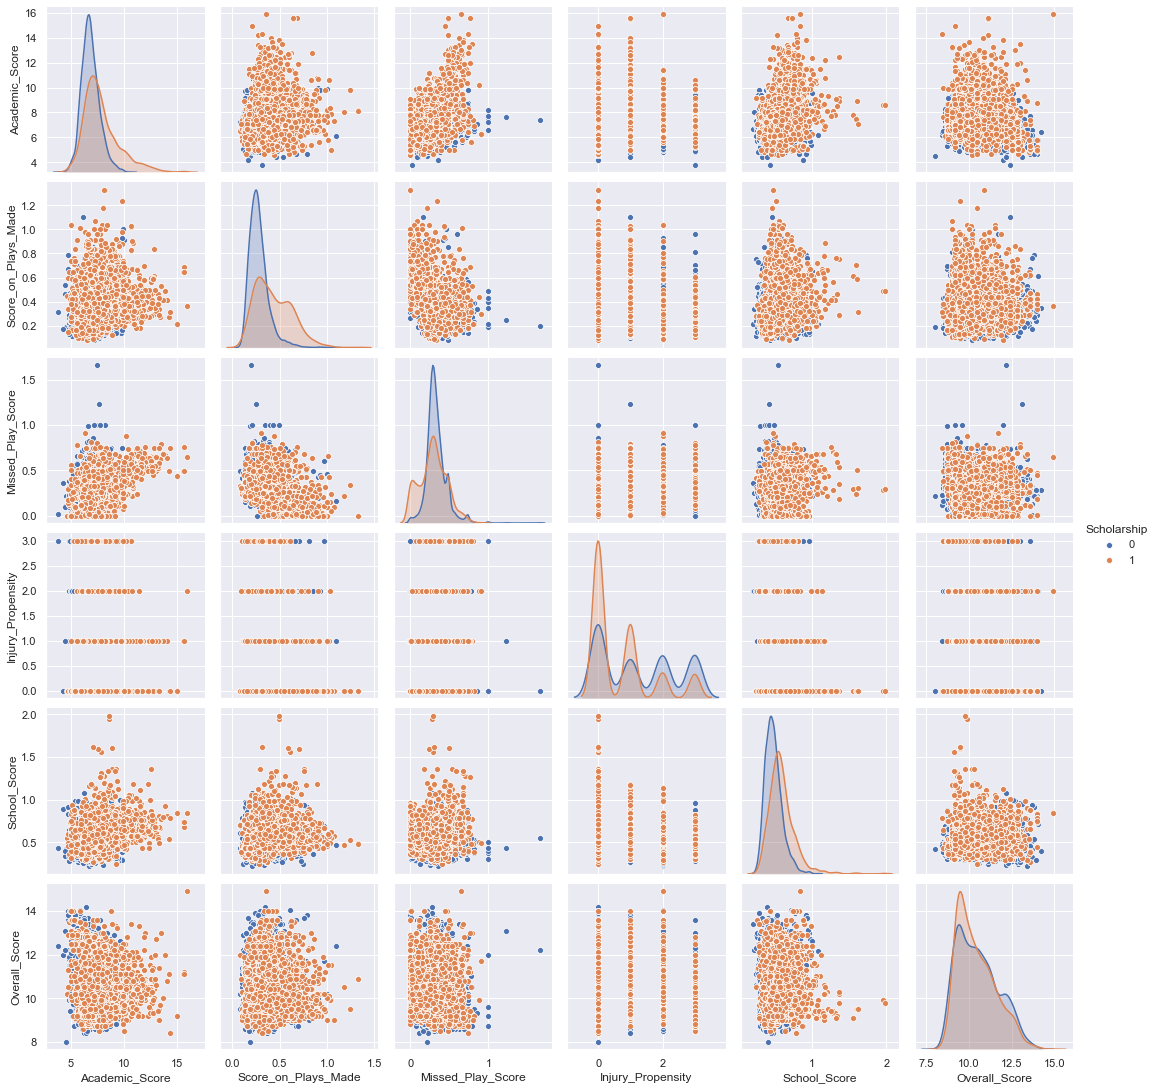

In [197]:
# Pairplot using sns

sns.pairplot(df, hue='Scholarship' , diag_kind = 'kde')

In [198]:
# let's see correlation between the different features
df_corr = df.corr(method ='pearson')
df_corr

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship
Academic_Score,1.000000,0.221827,0.325630,-0.105363,0.309948,-0.082724,0.373170
Score_on_Plays_Made,0.221827,1.000000,-0.365806,-0.169138,0.241303,-0.059938,0.468720
Missed_Play_Score,0.325630,-0.365806,1.000000,0.146459,0.053136,-0.012555,-0.129974
Injury_Propensity,-0.105363,-0.169138,0.146459,1.000000,-0.205012,-0.308666,-0.245753
School_Score,0.309948,0.241303,0.053136,-0.205012,1.000000,-0.005954,0.358391
Overall_Score,-0.082724,-0.059938,-0.012555,-0.308666,-0.005954,1.000000,-0.040647
Scholarship,0.373170,0.468720,-0.129974,-0.245753,0.358391,-0.040647,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

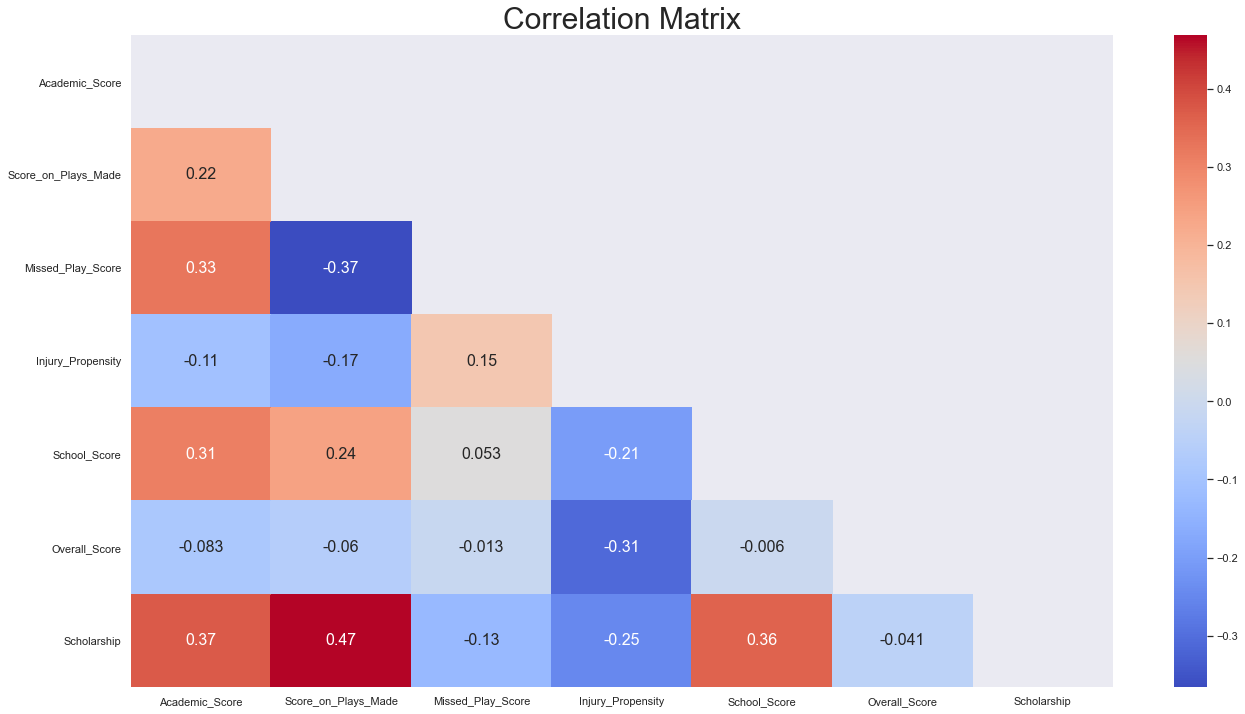

In [199]:
# Plotting heatmap
plt.subplots(figsize =(22, 12)) 
sns.heatmap(df_corr,cmap="coolwarm",annot=True, mask = np.triu(np.ones_like(df_corr, dtype=bool)))
plt.title("Correlation Matrix", size=30)

* we can see that score on plays mode Have a very high co-orealtion.


* Also we can see that there is multi-co-realinity between couple of varaible.


* We can also see that there is negative relation between Scholarship & missed play score.

Text(0.5, 1.0, 'Correlation with Scholarship')

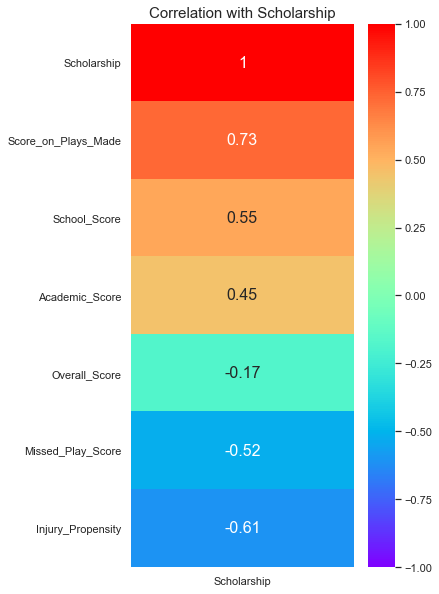

In [200]:
top_features = df_corr.corr()[['Scholarship']].sort_values(by=['Scholarship'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)
plt.title("Correlation with Scholarship", size=15)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       5268 non-null   float64
 1   Score_on_Plays_Made  5268 non-null   float64
 2   Missed_Play_Score    5268 non-null   float64
 3   Injury_Propensity    5268 non-null   int64  
 4   School_Type          5268 non-null   object 
 5   School_Score         5268 non-null   float64
 6   Overall_Score        5268 non-null   float64
 7   Region               5268 non-null   object 
 8   Scholarship          5268 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 571.6+ KB


In [202]:
num_cols = ['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score', 'Injury_Propensity', 'School_Score', 'Overall_Score']


ACADEMIC_SCORE


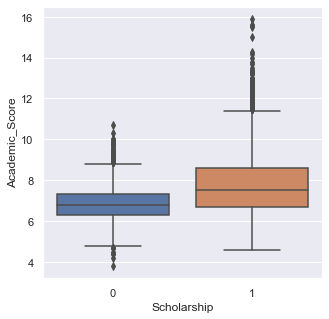

SCORE_ON_PLAYS_MADE


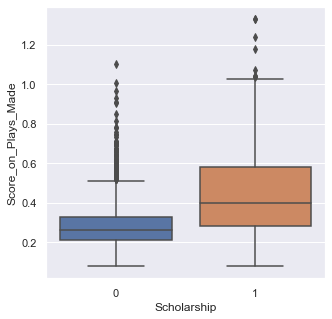

MISSED_PLAY_SCORE


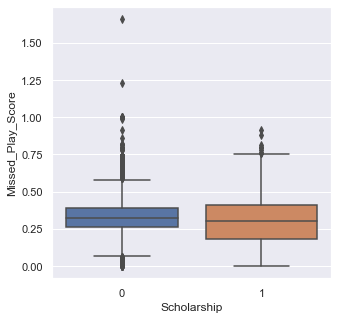

INJURY_PROPENSITY


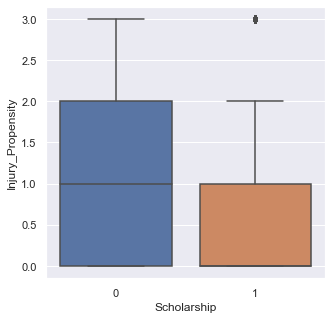

SCHOOL_SCORE


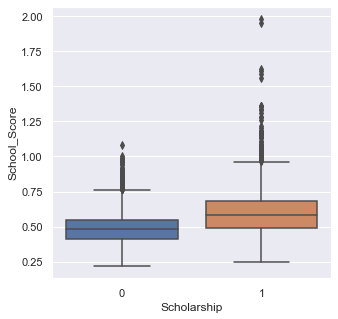

OVERALL_SCORE


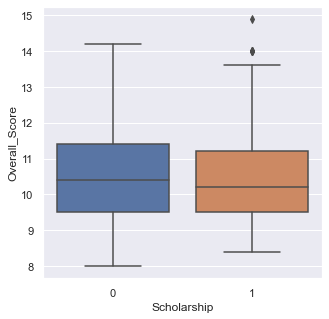

In [203]:
for col in num_cols:
    print(col.upper())
    sns.boxplot(x = 'Scholarship', y = col, data= df, orient= 'v')    
    plt.show()

### Pre Processing of Data

As in the above univariate analysis we have there are outliers in the datset. Will go ahead and treat the outliers.

In [204]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [205]:
# treating the outliers

def outlier_treatment(columns):
   
    for column in df[cont].columns:      
       
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 -Q1
        lower = Q1 - (1.5*IQR)
        higher = Q3 + (1.5*IQR)
   
        df[column] = np.where(df[column]>higher, higher , df[column])
        df[column] = np.where(df[column]<lower, lower , df[column])

df_columns =df.columns
outlier_treatment(df_columns)

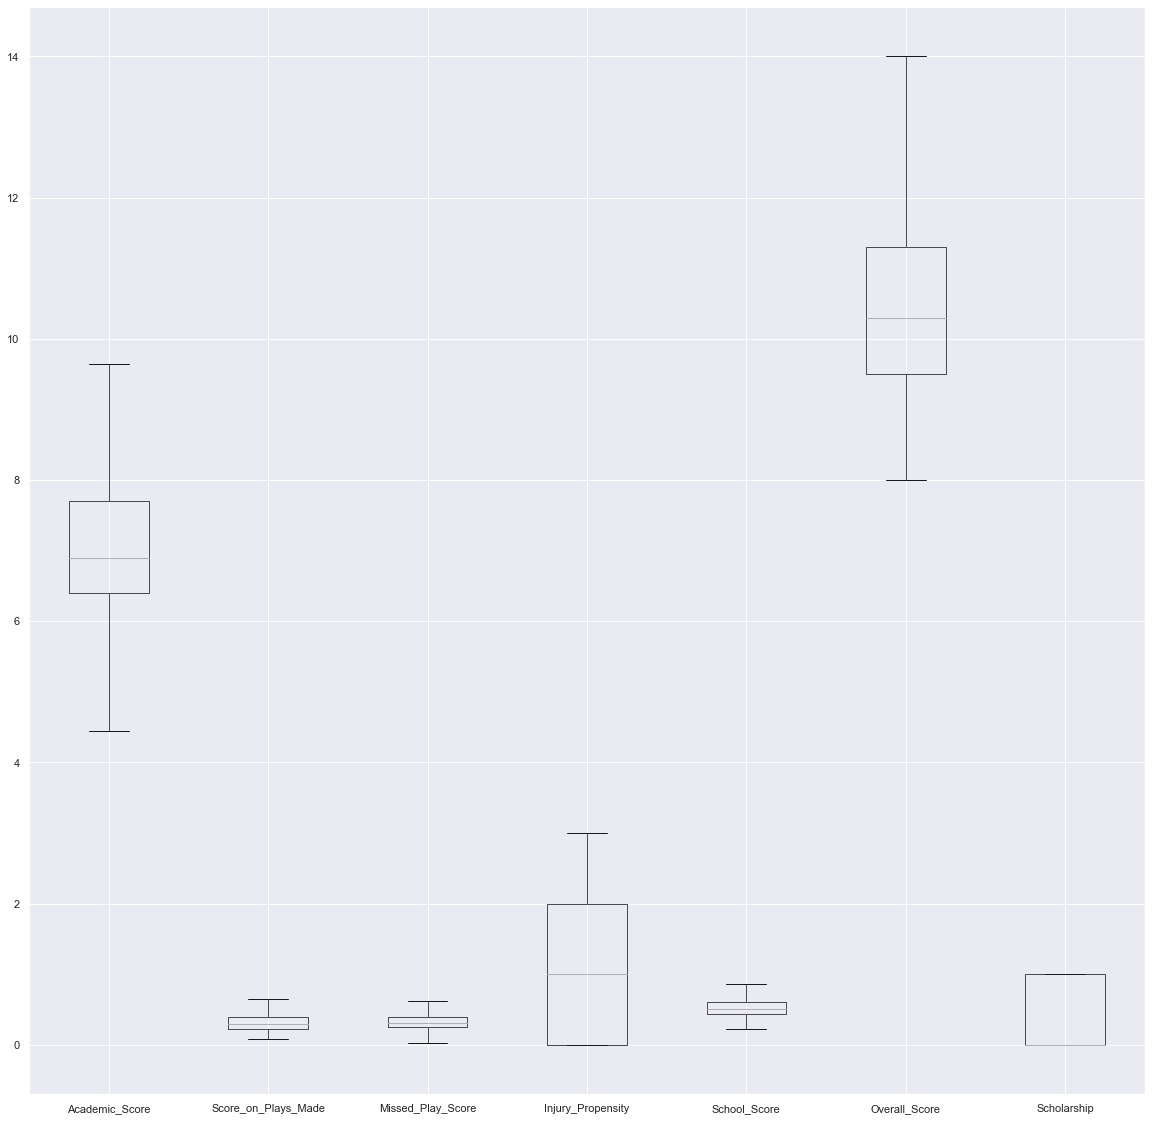

In [206]:
# boxplots after treating the outliers

df.boxplot(figsize=(20,20))
plt.xticks(rotation=0)
plt.show()

Basis above box plot we can see that we have got rid of outliers.

In [207]:
df.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,3.0,D,0.45,8.8,Eastern,0.0
1,6.3,0.30,0.34,0.0,C,0.49,9.5,Eastern,0.0
2,8.1,0.28,0.40,2.0,C,0.44,10.1,Eastern,0.0
3,7.2,0.23,0.32,2.0,C,0.40,9.9,Eastern,0.0
6,6.2,0.32,0.16,2.0,C,0.47,9.6,Eastern,1.0


In [208]:
# Let us look at the target column which is 'Scholarship' to understand how the data is distributed amongst the various values
df.groupby(["Scholarship"]).count()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region
Scholarship,,,,,,,,
0.0,3337,3337,3337,3337,3337,3337,3337,3337
1.0,1931,1931,1931,1931,1931,1931,1931,1931


### Handling categorical text Variables

In [209]:
data = pd.get_dummies(df, drop_first=True)
data.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0,0.27,0.36,3.0,0.45,8.8,0.0,0,1,0,0
1,6.3,0.30,0.34,0.0,0.49,9.5,0.0,1,0,0,0
2,8.1,0.28,0.40,2.0,0.44,10.1,0.0,1,0,0,0
3,7.2,0.23,0.32,2.0,0.40,9.9,0.0,1,0,0,0
6,6.2,0.32,0.16,2.0,0.47,9.6,1.0,1,0,0,0


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       5268 non-null   float64
 1   Score_on_Plays_Made  5268 non-null   float64
 2   Missed_Play_Score    5268 non-null   float64
 3   Injury_Propensity    5268 non-null   float64
 4   School_Score         5268 non-null   float64
 5   Overall_Score        5268 non-null   float64
 6   Scholarship          5268 non-null   float64
 7   School_Type_C        5268 non-null   uint8  
 8   School_Type_D        5268 non-null   uint8  
 9   Region_Southern      5268 non-null   uint8  
 10  Region_Western       5268 non-null   uint8  
dtypes: float64(7), uint8(4)
memory usage: 509.8 KB


# Logistic Regression Model

### Model 1 Considering all the variables

In [211]:
import statsmodels.formula.api as SM

In [212]:
data.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score', 'Scholarship',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western'],
      dtype='object')

In [213]:
model_1 = SM.logit(formula = 'Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity+School_Type_C+School_Type_D+Region_Southern+Region_Western', data=data).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.444215
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5257
Method:                           MLE   Df Model:                           10
Date:                Thu, 22 Apr 2021   Pseudo R-squ.:                  0.3240
Time:                        00:06:42   Log-Likelihood:                -2340.1
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.0594      0.551    -16.430      0.000     -10.140      -7.979
Academic_Score          0.4294      0.044      9.825      0.000       0.344       0.515
Score_on_Plays_Made     5.1342      0.322     15.931      0.000       4.503       5.766
Missed_Play_Score      -1.4835      0.345     -4.303      0.000      -2.159      -0.808
School_Score            2.8561      0.312      9.159      0.000       2.245       3.467
Overall_Score           0.2083      0.044      4.705      0.000       0.122       0.295
Injury_Propensity      -0.5544      0.043    -12.869      0.000      -0.639      -0.470
School_Type_C           1.3066      0.125     10.494      0.000       1.063       1.551
School_Type_D           2.3399      0.204     11.443      0.000       1.939       2.741
Region_Southern        -0.4837      0.091     -5.297      0.000      -0.663      -0.305
Region_Western          0.0227      0.092      0.248      0.804      -0.157       0.202
=======================================================================================
"""

In [214]:
def adj_pseudo_r2(model):
    return 1 - (model.llf-model.df_model)/model.llnull   

In [215]:
model_name = []
model_perf = []

model_name.append('Mod_1')
model_perf.append(adj_pseudo_r2(model_1))
adj_pseudo_r2(model_1)

0.32108239111187487

#### Lets check VIF values


In [216]:
def vif_cal(input_data):
    '''
    input_data: Dataframe of features
    '''
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (xvar_names[i], " VIF = " , vif)

In [217]:
data.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score', 'Scholarship',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western'],
      dtype='object')

In [218]:
vif_cal(input_data=data[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']])

Academic_Score  VIF =  1.68
Score_on_Plays_Made  VIF =  1.61
Missed_Play_Score  VIF =  1.52
Injury_Propensity  VIF =  1.73
School_Score  VIF =  1.29
Overall_Score  VIF =  1.97
School_Type_C  VIF =  2.92
School_Type_D  VIF =  4.12
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.25


#### Considering the threshold value of 2 for VIF, we go ahead and drop the variable School_Type_D which has the maximum VIF value of 4.17 

### Model 2 By dropping Variable School_Type_D

In [219]:
data.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score', 'Scholarship',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western'],
      dtype='object')

In [220]:
model_2 = SM.logit(formula = 'Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity+School_Type_C+Region_Southern+Region_Western', data=data).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.457338
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5258
Method:                           MLE   Df Model:                            9
Date:                Thu, 22 Apr 2021   Pseudo R-squ.:                  0.3040
Time:                        00:06:50   Log-Likelihood:                -2409.3
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -7.3399      0.513    -14.316      0.000      -8.345      -6.335
Academic_Score          0.6178      0.040     15.510      0.000       0.540       0.696
Score_on_Plays_Made     5.9450      0.313     18.999      0.000       5.332       6.558
Missed_Play_Score      -1.2916      0.339     -3.813      0.000      -1.955      -0.628
School_Score            3.9312      0.294     13.357      0.000       3.354       4.508
Overall_Score          -0.0994      0.035     -2.865      0.004      -0.167      -0.031
Injury_Propensity      -0.2990      0.036     -8.418      0.000      -0.369      -0.229
School_Type_C           0.2332      0.078      2.974      0.003       0.080       0.387
Region_Southern        -0.4937      0.090     -5.494      0.000      -0.670      -0.318
Region_Western          0.0011      0.090      0.012      0.990      -0.175       0.177
=======================================================================================
"""

In [221]:
model_name.append('Mod_2')
model_perf.append(adj_pseudo_r2(model_2))
adj_pseudo_r2(model_2)

0.30140060914375

In [222]:
vif_cal(input_data=data[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity','School_Type_C','Region_Southern','Region_Western']])

Academic_Score  VIF =  1.39
Score_on_Plays_Made  VIF =  1.51
Missed_Play_Score  VIF =  1.52
School_Score  VIF =  1.19
Overall_Score  VIF =  1.28
Injury_Propensity  VIF =  1.24
School_Type_C  VIF =  1.13
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.25


Post Dropping the School_Type_C variable.  

All the varaibles are below thresold of 2. Hence we will go ahed and drop the insignificant varaibles with by checking P value.

### Model 3 By Dropping the Region_Western varaible.

In [223]:
model_3 = SM.logit(formula = 'Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity+School_Type_C+Region_Southern', data=data).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.457338
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5259
Method:                           MLE   Df Model:                            8
Date:                Thu, 22 Apr 2021   Pseudo R-squ.:                  0.3040
Time:                        00:06:51   Log-Likelihood:                -2409.3
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -7.3396      0.512    -14.328      0.000      -8.344      -6.336
Academic_Score          0.6178      0.040     15.516      0.000       0.540       0.696
Score_on_Plays_Made     5.9457      0.308     19.273      0.000       5.341       6.550
Missed_Play_Score      -1.2918      0.339     -3.815      0.000      -1.955      -0.628
School_Score            3.9312      0.294     13.358      0.000       3.354       4.508
Overall_Score          -0.0994      0.035     -2.865      0.004      -0.167      -0.031
Injury_Propensity      -0.2990      0.035     -8.458      0.000      -0.368      -0.230
School_Type_C           0.2331      0.078      2.990      0.003       0.080       0.386
Region_Southern        -0.4941      0.084     -5.863      0.000      -0.659      -0.329
=======================================================================================
"""

In [224]:
model_name.append('Mod_3')
model_perf.append(adj_pseudo_r2(model_3))
adj_pseudo_r2(model_3)

0.3016894722325786

In [225]:
vif_cal(input_data=data[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity','School_Type_C','Region_Southern']])

Academic_Score  VIF =  1.39
Score_on_Plays_Made  VIF =  1.46
Missed_Play_Score  VIF =  1.52
School_Score  VIF =  1.18
Overall_Score  VIF =  1.28
Injury_Propensity  VIF =  1.23
School_Type_C  VIF =  1.12
Region_Southern  VIF =  1.09


In [226]:
model_eval = pd.DataFrame({'model_name': model_name, 'model_perf': model_perf}, index=range(1,4))
model_eval

,model_name,model_perf
1,Mod_1,0.321082
2,Mod_2,0.301401
3,Mod_3,0.301689


Based on Adjusted Pseudo R square we can see that Model 3 seems to good with important varaibles and free from multi collinearity. 

## Let's now move on to the Predictive Approach

### Splitting the data into train and test.

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
Train, Test = train_test_split(data, test_size=0.3, random_state=10, stratify = data['Scholarship'])

In [229]:
print(Train['Scholarship'].value_counts(normalize=True),'\n')
print(Test['Scholarship'].value_counts(normalize=True))

0.0    0.633577
1.0    0.366423
Name: Scholarship, dtype: float64 

0.0    0.633144
1.0    0.366856
Name: Scholarship, dtype: float64


In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
lr = LogisticRegression(penalty='none')

### Using only the Model 1, 2 and 3 variables to build the models on training data

In [232]:
model_sk_1 = LogisticRegression(penalty='none')
model_sk_1 = model_sk_1.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']], Train['Scholarship'])
# Predicting on the Training Data
model_sk_1_pred_train = model_sk_1.predict(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']])
# Predicting on the Test Data
model_sk_1_pred_test = model_sk_1.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']])
# Getting probabilities for Test Data
model_sk_1_pred_test_prob = model_sk_1.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western']])[:, 1]

In [233]:
model_sk_2 = LogisticRegression(penalty='none')
model_sk_2 = model_sk_2.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'Region_Southern', 'Region_Western']], Train['Scholarship'])
# Predicting on the Training Data
model_sk_2_pred_train = model_sk_2.predict(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'Region_Southern', 'Region_Western']])
# Predicting on the Test Data
model_sk_2_pred_test = model_sk_2.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'Region_Southern', 'Region_Western']])
# Getting probabilities for Test Data
model_sk_2_pred_test_prob = model_sk_2.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'Region_Southern', 'Region_Western']])[:, 1]

In [234]:
model_sk_3 = LogisticRegression(penalty='none')
model_sk_3 = model_sk_3.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'Region_Southern']], Train['Scholarship'])
# Predicting on the Training Data
model_sk_3_pred_train = model_sk_3.predict(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'Region_Southern']])
# Predicting on the Test Data
model_sk_3_pred_test = model_sk_3.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'Region_Southern']])
# Getting probabilities for Test Data
model_sk_3_pred_test_prob = model_sk_3.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_C', 'Region_Southern']])[:, 1]

In [235]:
from sklearn.metrics import confusion_matrix, classification_report

### Model Evaluation¶

In [236]:
from sklearn import metrics

In [237]:
from sklearn.metrics import accuracy_score


We will start by checking the confusion matrix and then the classification report as well.

### Accuracy Train

In [238]:
LR_Model_1_Train = accuracy_score(Train['Scholarship'], model_sk_1_pred_train)
LR_Model_1_Train

0.844317873609981

Confusion_matrix for train data

In [239]:
LR_Model_1_Train_cf = metrics.confusion_matrix(Train['Scholarship'], model_sk_1_pred_train)

True Negative: 2208 
False Positives: 128 
False Negatives: 446 
True Positives: 905


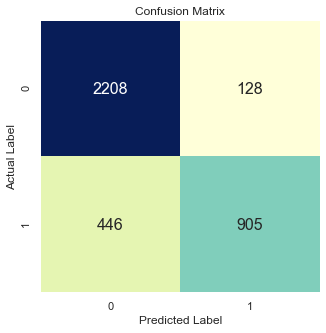

In [240]:
tn, fp, fn, tp = metrics.confusion_matrix(Train['Scholarship'],model_sk_1_pred_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Train['Scholarship'],model_sk_1_pred_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [241]:
print(classification_report(Train['Scholarship'], model_sk_1_pred_train))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88      2336
         1.0       0.88      0.67      0.76      1351

    accuracy                           0.84      3687
   macro avg       0.85      0.81      0.82      3687
weighted avg       0.85      0.84      0.84      3687



### Accuracy Test

In [242]:
LR_Model_1_Test = accuracy_score(Test['Scholarship'], model_sk_1_pred_test)
LR_Model_1_Test

0.8349146110056926

In [243]:
LR_Model_1_Test_cf = metrics.confusion_matrix(Test['Scholarship'], model_sk_1_pred_test)

True Negative: 936 
False Positives: 65 
False Negatives: 196 
True Positives: 384


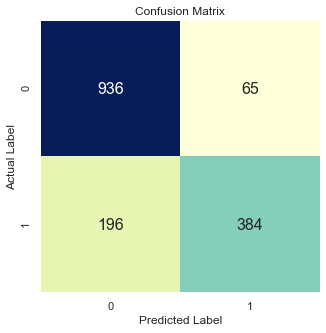

In [244]:
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'], model_sk_1_pred_test).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Test['Scholarship'], model_sk_1_pred_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [245]:
print(classification_report(Test['Scholarship'], model_sk_1_pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      1001
         1.0       0.86      0.66      0.75       580

    accuracy                           0.83      1581
   macro avg       0.84      0.80      0.81      1581
weighted avg       0.84      0.83      0.83      1581



### Model 2

### Accuracy Train

In [246]:
LR_Model_2_Train = accuracy_score(Train['Scholarship'], model_sk_2_pred_train)
LR_Model_2_Train

0.8329264985082723

In [247]:
LR_Model_2_Train_cf = metrics.confusion_matrix(Train['Scholarship'], model_sk_2_pred_train)

True Negative: 2187 
False Positives: 149 
False Negatives: 467 
True Positives: 884


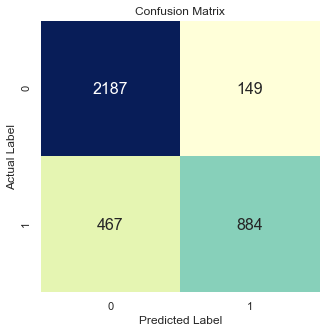

In [248]:
tn, fp, fn, tp = metrics.confusion_matrix(Train['Scholarship'], model_sk_2_pred_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Train['Scholarship'], model_sk_2_pred_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [249]:
print(classification_report(Train['Scholarship'], model_sk_2_pred_train))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      2336
         1.0       0.86      0.65      0.74      1351

    accuracy                           0.83      3687
   macro avg       0.84      0.80      0.81      3687
weighted avg       0.84      0.83      0.83      3687



### Accuracy Test

In [250]:
LR_Model_2_Test = accuracy_score(Test['Scholarship'], model_sk_2_pred_test)
LR_Model_2_Test

0.8235294117647058

In [251]:
LR_Model_2_Test_cf = metrics.confusion_matrix(Test['Scholarship'], model_sk_2_pred_test)

True Negative: 928 
False Positives: 73 
False Negatives: 206 
True Positives: 374


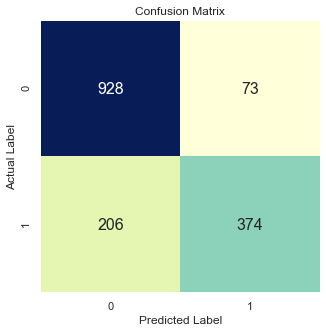

In [252]:
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'], model_sk_2_pred_test).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Test['Scholarship'], model_sk_2_pred_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [253]:
print(classification_report(Test['Scholarship'], model_sk_2_pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1001
         1.0       0.84      0.64      0.73       580

    accuracy                           0.82      1581
   macro avg       0.83      0.79      0.80      1581
weighted avg       0.83      0.82      0.82      1581



## Model 3

### Accuracy Train

In [254]:
LR_Model_3_Train = accuracy_score(Train['Scholarship'], model_sk_3_pred_train)
LR_Model_3_Train

0.8326552752915649

In [255]:
LR_Model_3_Train_cf = metrics.confusion_matrix(Train['Scholarship'], model_sk_3_pred_train)

True Negative: 2188 
False Positives: 148 
False Negatives: 469 
True Positives: 882


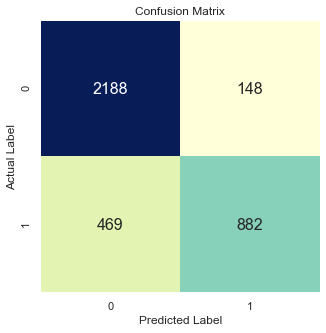

In [256]:
tn, fp, fn, tp = metrics.confusion_matrix(Train['Scholarship'], model_sk_3_pred_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Train['Scholarship'], model_sk_3_pred_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [257]:
print(classification_report(Train['Scholarship'], model_sk_3_pred_train))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      2336
         1.0       0.86      0.65      0.74      1351

    accuracy                           0.83      3687
   macro avg       0.84      0.79      0.81      3687
weighted avg       0.84      0.83      0.83      3687



### Accuracy Test

In [258]:
LR_Model_3_Test = accuracy_score(Test['Scholarship'], model_sk_3_pred_test)
LR_Model_3_Test

0.8235294117647058

In [259]:
LR_Model_3_Test_cf = metrics.confusion_matrix(Test['Scholarship'], model_sk_3_pred_test)

True Negative: 929 
False Positives: 72 
False Negatives: 207 
True Positives: 373


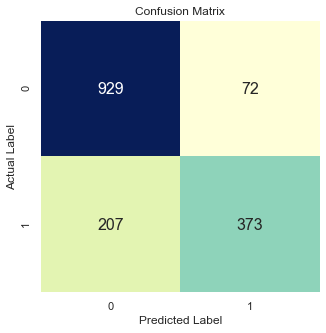

In [260]:
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'], model_sk_3_pred_test).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Test['Scholarship'], model_sk_3_pred_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [261]:
print(classification_report(Test['Scholarship'], model_sk_3_pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1001
         1.0       0.84      0.64      0.73       580

    accuracy                           0.82      1581
   macro avg       0.83      0.79      0.80      1581
weighted avg       0.83      0.82      0.82      1581



In [262]:
from sklearn.metrics import roc_curve, roc_auc_score

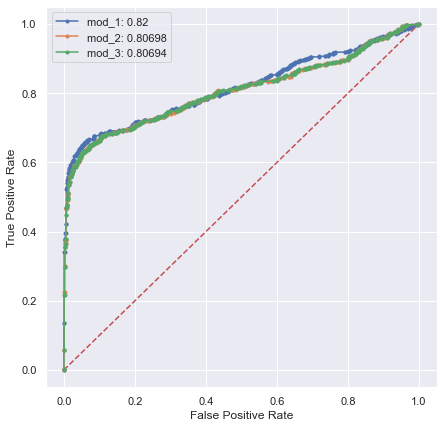

In [263]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

fpr1, tpr1, thresholds1 = roc_curve(Test['Scholarship'], model_sk_1_pred_test_prob) # Model 1
auc = roc_auc_score(Test['Scholarship'], model_sk_1_pred_test_prob) # getting AUC for the model
# plot the roc curve for the model
plt.plot(fpr1, tpr1, marker='.', label = 'mod_1: %.2f'% auc)

fpr2, tpr2, thresholds2 = roc_curve(Test['Scholarship'], model_sk_2_pred_test_prob) # Model 5
auc = roc_auc_score(Test['Scholarship'], model_sk_2_pred_test_prob) # getting AUC for the model
plt.plot(fpr2, tpr2, marker='.', label = 'mod_2: %.5f'% auc)

fpr3, tpr3, thresholds3 = roc_curve(Test['Scholarship'], model_sk_3_pred_test_prob) # Model 6
auc = roc_auc_score(Test['Scholarship'], model_sk_3_pred_test_prob) # getting AUC for the model
plt.plot(fpr3, tpr3, marker='.', label = 'mod_3: %.5f'% auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## LDA Model

### Splitting the data into train and test

In [264]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [265]:
X_1 = data.drop('Scholarship', axis=1)
Y_1 = data.Scholarship

In [266]:
from sklearn.model_selection import train_test_split
X_Train_1, X_Test_1, Y_Train_1, Y_Test_1 = train_test_split(X_1, Y_1, test_size=.30, random_state=10, stratify = Y_1)

### Model 1 

In [267]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score

In [268]:
lda = LinearDiscriminantAnalysis()
model_1 = lda.fit(X_Train_1, Y_Train_1)
model_1

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [269]:
model_1.coef_

array([[ 0.49741457,  6.6911782 , -1.59163382, -0.66093561,  3.43057556,
         0.28379994,  1.75822596,  2.62734905, -0.50089454,  0.03591686]])

In [270]:
Z_Train = model_1.transform(X_Train_1)
Z_Train[:]

array([[ 2.06275678],
       [-0.96796988],
       [-1.45030201],
       ...,
       [-1.01743143],
       [ 2.49645307],
       [-0.49910889]])

In [271]:
model_1.priors_

array([0.63357743, 0.36642257])

In [272]:
train_predict_1 = model_1.predict(X_Train_1)
test_predict_1 = model_1.predict(X_Test_1)

In [273]:
train_predict_prob_1 = model_1.predict_proba(X_Train_1)[:, 1] # Getting probabilities
test_predict_prob_1 = model_1.predict_proba(X_Test_1)[:, 1]

### Model 1.

### Accuracy train

In [274]:
LDA_Model_1_Train = accuracy_score(Y_Train_1, train_predict_1)
LDA_Model_1_Train

0.8451315432601031

In [275]:
LDA_Model_1_Train_cf = metrics.confusion_matrix(Y_Train_1, train_predict_1)

True Negative: 2224 
False Positives: 112 
False Negatives: 459 
True Positives: 892


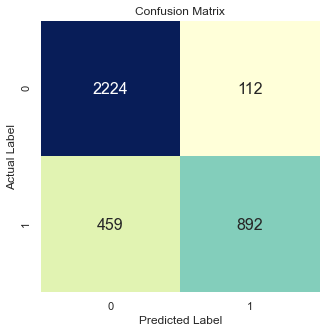

In [276]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_Train_1, train_predict_1).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Y_Train_1, train_predict_1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [277]:
print(classification_report(Y_Train_1, train_predict_1))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      2336
         1.0       0.89      0.66      0.76      1351

    accuracy                           0.85      3687
   macro avg       0.86      0.81      0.82      3687
weighted avg       0.85      0.85      0.84      3687



### Accuracy Test

In [278]:
LDA_Model_1_Test = accuracy_score(Y_Test_1, test_predict_1)
LDA_Model_1_Test

0.8349146110056926

In [279]:
LDA_Model_1_Test_cf = metrics.confusion_matrix(Y_Test_1, test_predict_1)

True Negative: 941 
False Positives: 60 
False Negatives: 201 
True Positives: 379


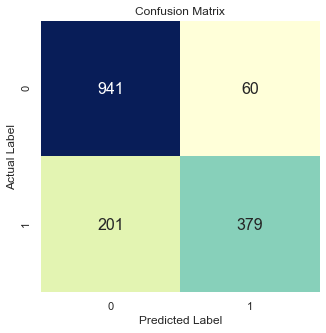

In [280]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_Test_1, test_predict_1).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Y_Test_1, test_predict_1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [281]:
print(classification_report(Y_Test_1, test_predict_1))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      1001
         1.0       0.86      0.65      0.74       580

    accuracy                           0.83      1581
   macro avg       0.84      0.80      0.81      1581
weighted avg       0.84      0.83      0.83      1581



### Model 2 


In [282]:
X_2 = data.drop(['Scholarship','School_Type_D' ], axis=1)
Y_2 = data.Scholarship

In [283]:
from sklearn.model_selection import train_test_split
X_Train_2, X_Test_2, Y_Train_2, Y_Test_2 = train_test_split(X_2, Y_2, test_size=.30, random_state=10, stratify = Y_2)

In [284]:
lda = LinearDiscriminantAnalysis()
model_2 = lda.fit(X_Train_2, Y_Train_2)
model_2

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [285]:
model_2.coef_

array([[ 0.72295165,  7.46209238, -1.48199456, -0.34618509,  4.52959963,
        -0.05768577,  0.41839131, -0.48639372, -0.0010295 ]])

In [286]:
Z_Train = model_2.transform(X_Train_2)
Z_Train[:5]

array([[ 2.29599309],
       [-0.50326346],
       [-0.98444199],
       [-0.81420549],
       [-1.09042177]])

In [287]:
model_2.priors_

array([0.63357743, 0.36642257])

In [288]:
train_predict_2 = model_2.predict(X_Train_2)
test_predict_2 = model_2.predict(X_Test_2)

In [289]:
train_predict_prob_2 = model_2.predict_proba(X_Train_2)[:, 1] # Getting probabilities
test_predict_prob_2 = model_2.predict_proba(X_Test_2)[:, 1]

In [290]:
accuracy_score(Y_Train_2, train_predict_2)

0.8323840520748577

### Model 2

### Accuracy Train

In [291]:
LDA_Model_2_Train = accuracy_score(Y_Train_2, train_predict_2)
LDA_Model_2_Train

0.8323840520748577

In [292]:
LDA_Model_2_Train_cf = metrics.confusion_matrix(Y_Train_2, train_predict_2)

True Negative: 2200 
False Positives: 136 
False Negatives: 482 
True Positives: 869


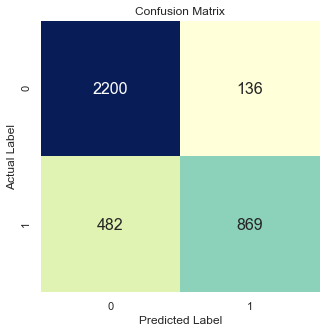

In [293]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_Train_2, train_predict_2).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Y_Train_2, train_predict_2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [294]:
print(classification_report(Y_Train_2, train_predict_2))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      2336
         1.0       0.86      0.64      0.74      1351

    accuracy                           0.83      3687
   macro avg       0.84      0.79      0.81      3687
weighted avg       0.84      0.83      0.83      3687



### Accuracy Test

In [295]:
LDA_Model_2_Test = accuracy_score(Y_Test_2, test_predict_2)
LDA_Model_2_Test

0.8247944339025933

In [296]:
LDA_Model_2_Test_cf = metrics.confusion_matrix(Y_Test_2, test_predict_2)

True Negative: 934 
False Positives: 67 
False Negatives: 210 
True Positives: 370


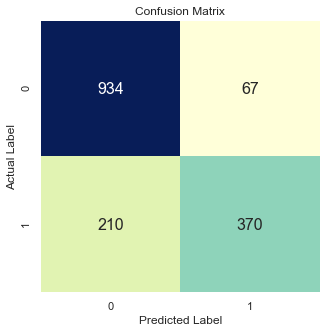

In [297]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_Test_2, test_predict_2).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Y_Test_2, test_predict_2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [298]:
print(classification_report(Y_Test_2, test_predict_2))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1001
         1.0       0.85      0.64      0.73       580

    accuracy                           0.82      1581
   macro avg       0.83      0.79      0.80      1581
weighted avg       0.83      0.82      0.82      1581



### Model 3 

In [299]:
X_3 = data.drop(['Scholarship','School_Type_D','Region_Western' ], axis=1)
Y_3 = data.Scholarship

In [300]:
from sklearn.model_selection import train_test_split
X_Train_3, X_Test_3, Y_Train_3, Y_Test_3 = train_test_split(X_3, Y_3, test_size=.30, random_state=10, stratify = Y_3)

In [301]:
lda = LinearDiscriminantAnalysis()
model_3 = lda.fit(X_Train_3, Y_Train_3)
model_3

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [302]:
model_3.coef_

array([[ 0.72294311,  7.46142721, -1.4818952 , -0.34614847,  4.52969911,
        -0.05767538,  0.41848073, -0.48604654]])

In [303]:
Z_Train = model_3.transform(X_Train_3)
Z_Train[:5]

array([[ 2.29562265],
       [-0.50350777],
       [-0.98469403],
       [-0.81435147],
       [-1.09063   ]])

In [304]:
model_3.priors_

array([0.63357743, 0.36642257])

In [305]:
train_predict_3 = model_3.predict(X_Train_3)
test_predict_3 = model_3.predict(X_Test_3)

In [306]:
train_predict_prob_3 = model_3.predict_proba(X_Train_3)[:, 1] # Getting probabilities
test_predict_prob_3 = model_3.predict_proba(X_Test_3)[:, 1]

### Model 3

### Accuracy Train

In [307]:
LDA_Model_3_Train = accuracy_score(Y_Train_3, train_predict_3)
LDA_Model_3_Train

0.8323840520748577

In [308]:
LDA_Model_3_Train_cf = metrics.confusion_matrix(Y_Train_3, train_predict_3)

True Negative: 2200 
False Positives: 136 
False Negatives: 482 
True Positives: 869


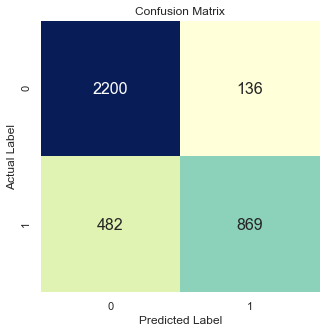

In [309]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_Train_3, train_predict_3).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Y_Train_3, train_predict_3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [310]:
print(classification_report(Y_Train_3, train_predict_3))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      2336
         1.0       0.86      0.64      0.74      1351

    accuracy                           0.83      3687
   macro avg       0.84      0.79      0.81      3687
weighted avg       0.84      0.83      0.83      3687



### Accuracy Test

In [311]:
LDA_Model_3_Test = accuracy_score(Y_Test_3, test_predict_3)
LDA_Model_3_Test

0.8247944339025933

In [312]:
LDA_Model_3_Test_cf = metrics.confusion_matrix(Y_Test_3, test_predict_3)

True Negative: 934 
False Positives: 67 
False Negatives: 210 
True Positives: 370


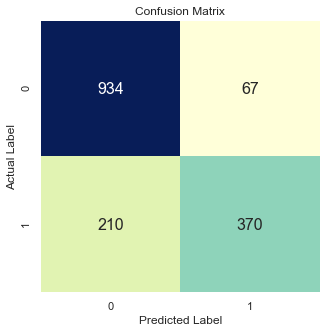

In [313]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_Test_3, test_predict_3).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(Y_Test_3, test_predict_3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show() 

In [314]:
print(classification_report(Y_Test_3, test_predict_3))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1001
         1.0       0.85      0.64      0.73       580

    accuracy                           0.82      1581
   macro avg       0.83      0.79      0.80      1581
weighted avg       0.83      0.82      0.82      1581



### AUC-ROC summary statistics Evaluation on the Test Data. Calculate the AUC-ROC curves and the AUC values.


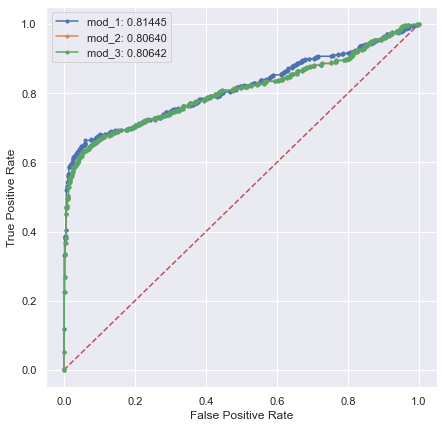

In [315]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

fpr1, tpr1, thresholds1 = roc_curve(Y_Test_1, test_predict_prob_1) # Model 1
auc = roc_auc_score(Y_Test_1, test_predict_prob_1) # getting AUC for the model
# plot the roc curve for the model
plt.plot(fpr1, tpr1, marker='.', label = 'mod_1: %.5f'% auc)

fpr2, tpr2, thresholds2 = roc_curve(Y_Test_2, test_predict_prob_2) # Model 2
auc = roc_auc_score(Y_Test_2, test_predict_prob_2) # getting AUC for the model
plt.plot(fpr2, tpr2, marker='.', label = 'mod_2: %.5f'% auc)

fpr3, tpr3, thresholds3 = roc_curve(Y_Test_3, test_predict_prob_3) # Model 3
auc = roc_auc_score(Y_Test_3, test_predict_prob_3) # getting AUC for the model
plt.plot(fpr3, tpr3, marker='.', label = 'mod_3: %.5f'% auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

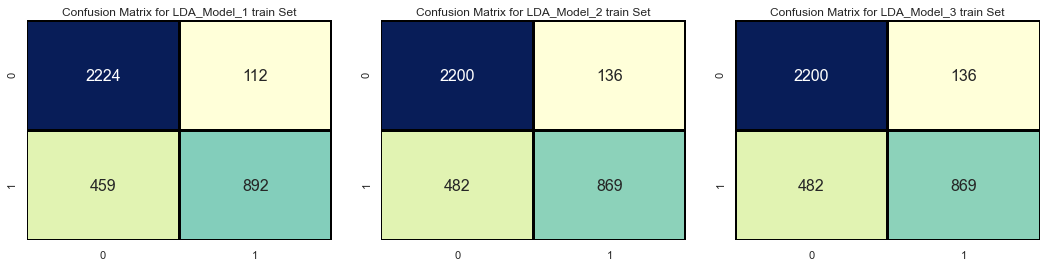

In [316]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,4))

ax1=sns.heatmap(LDA_Model_1_Train_cf,annot=True, fmt='d', cbar=False,cmap='YlGnBu',linewidths=2, linecolor='black', ax=axes[0])
ax1.title.set_text('Confusion Matrix for LDA_Model_1 train Set')

ax2=sns.heatmap(LDA_Model_2_Train_cf,annot=True, fmt='d',cmap='YlGnBu',linewidths=2, linecolor='black',cbar=False,ax=axes[1])
ax2.title.set_text('Confusion Matrix for LDA_Model_2 train Set')

ax3=sns.heatmap(LDA_Model_3_Train_cf,annot=True, fmt='d', linewidths=2, linecolor='black',cbar=False,cmap='YlGnBu',ax=axes[2])
ax3.title.set_text('Confusion Matrix for LDA_Model_3 train Set')

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

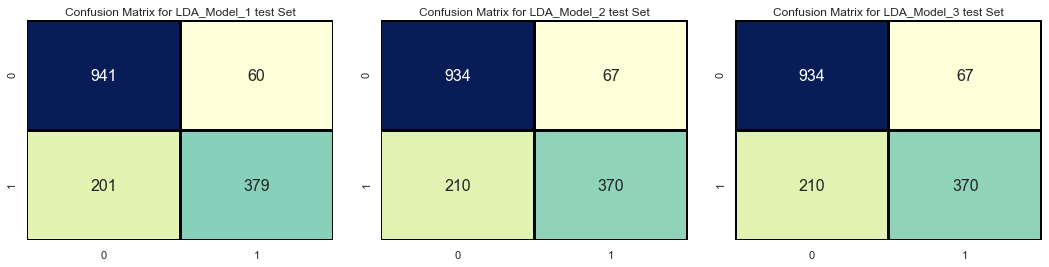

In [317]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,4))

ax4=sns.heatmap(LDA_Model_1_Test_cf,annot=True, fmt='d', cbar=False,cmap='YlGnBu',linewidths=2, linecolor='black', ax=axes[0])
ax4.title.set_text('Confusion Matrix for LDA_Model_1 test Set')

ax5=sns.heatmap(LDA_Model_2_Test_cf,annot=True, fmt='d',cmap='YlGnBu',linewidths=2, linecolor='black',cbar=False,ax=axes[1])
ax5.title.set_text('Confusion Matrix for LDA_Model_2 test Set')

ax6=sns.heatmap(LDA_Model_3_Test_cf,annot=True, fmt='d', linewidths=2, linecolor='black',cbar=False,cmap='YlGnBu',ax=axes[2])
ax6.title.set_text('Confusion Matrix for LDA_Model_3 test Set')

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

In [318]:
index=['Train-Accuracy','Test-Accuracy']
columns=['LR_Model_1','LR_Model_2','LR_Model_3','LDA_Model_1','LDA_Model_2','LDA_Model_3']
train = [LR_Model_1_Train,LR_Model_2_Train,LR_Model_3_Train,LDA_Model_1_Train,LDA_Model_2_Train,LDA_Model_3_Train]
test = [LR_Model_1_Test,LR_Model_2_Test,LR_Model_3_Test,LDA_Model_1_Test,LDA_Model_2_Test,LDA_Model_3_Test]
#
data = pd.DataFrame([train,test],index=index,columns=columns)
round(data,7)

,LR_Model_1,LR_Model_2,LR_Model_3,LDA_Model_1,LDA_Model_2,LDA_Model_3
Train-Accuracy,0.844318,0.832927,0.832655,0.845132,0.832384,0.832384
Test-Accuracy,0.834915,0.823529,0.823529,0.834915,0.824794,0.824794


### LDA_Model_1 Seems to be perforing good compared to other models.